In [49]:
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn
%matplotlib inline

In [2]:
#download Energy and Water Data Disclosure for Local Law 84 (2013)
APIendPoint = 'https://data.cityofnewyork.us/resource/m46j-75iy.csv' 
nrg = pd.read_csv(APIendPoint)
nrg.head()

,automatic_water_benchmarking_eligible,bbls_co_reported,borough,co_reported_bbl_status,direct_ghg_emissions_mtco2e,dof_benchmarking_submission_status,dof_number_of_buildings,dof_property_floor_area_buildngs_and_parking_ft2,energy_star_score,indirect_ghg_emissions_mtco2e,...,reported_property_floor_area_building_s_ft,reported_water_method,site_eui_kbtu_ft2,source_eui_kbtu_ft2,street_name,street_number,total_ghg_emissions_mtco2e,weather_normalized_site_eui_kbtu_ft2,weather_normalized_source_eui_kbtu_ft2,zip_code
0,NaN,1000410001,Manhattan,NaN,NaN,BBL not valid,NaN,NaN,Not Available,NaN,...,918919,NaN,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN
1,Yes,NaN,Queens,NaN,NaN,No Submission Matched to BBL,1.0,82730.0,NaN,NaN,...,NaN,None,NaN,NaN,108 STREET,63-10,NaN,NaN,NaN,11375.0
2,NaN,2027620097,Bronx,NaN,NaN,BBL not valid,NaN,NaN,Not Available,NaN,...,64200,NaN,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN
3,No,NaN,Manhattan,NaN,NaN,No Submission Matched to BBL,1.0,440360.0,NaN,NaN,...,NaN,None,NaN,NaN,11 AVENUE,201,NaN,NaN,NaN,10001.0
4,NaN,2048300034,Bronx,NaN,NaN,Not on Covered Buildings List,NaN,NaN,Not Available,NaN,...,50000,None,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN


In [3]:
os.getenv("PUIDATA")

'/home/pipe/Dropbox/NYU/classes/principles/puiDATA'

In [ ]:
#download pluto data
plutoVersion = 'mappluto_16v1.zip'
plutoURL = 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/'  
os.system("wget " + plutoURL + plutoVersion)


In [4]:
bsize = gpd.read_file(os.getenv("PUIDATA") + "/Manhattan/MNMapPLUTO.shp")


In [5]:
print nrg.columns
nrg.rename(columns={'nyc_borough_block_and_lot_bbl': 'BBL'}, inplace=True)
print nrg.columns


Index([u'automatic_water_benchmarking_eligible', u'bbls_co_reported',
       u'borough', u'co_reported_bbl_status', u'direct_ghg_emissions_mtco2e',
       u'dof_benchmarking_submission_status', u'dof_number_of_buildings',
       u'dof_property_floor_area_buildngs_and_parking_ft2',
       u'energy_star_score', u'indirect_ghg_emissions_mtco2e',
       u'municipally_supplied_potable_water_indoor_intensity_gal_ft',
       u'nyc_borough_block_and_lot_bbl',
       u'primary_property_type_self_selected', u'record_number',
       u'reported_nyc_building_identificaiton_numbers_bins',
       u'reported_property_floor_area_building_s_ft', u'reported_water_method',
       u'site_eui_kbtu_ft2', u'source_eui_kbtu_ft2', u'street_name',
       u'street_number', u'total_ghg_emissions_mtco2e',
       u'weather_normalized_site_eui_kbtu_ft2',
       u'weather_normalized_source_eui_kbtu_ft2', u'zip_code'],
      dtype='object')
Index([u'automatic_water_benchmarking_eligible', u'bbls_co_reported',
       u'

In [6]:
nrg.head()

,automatic_water_benchmarking_eligible,bbls_co_reported,borough,co_reported_bbl_status,direct_ghg_emissions_mtco2e,dof_benchmarking_submission_status,dof_number_of_buildings,dof_property_floor_area_buildngs_and_parking_ft2,energy_star_score,indirect_ghg_emissions_mtco2e,...,reported_property_floor_area_building_s_ft,reported_water_method,site_eui_kbtu_ft2,source_eui_kbtu_ft2,street_name,street_number,total_ghg_emissions_mtco2e,weather_normalized_site_eui_kbtu_ft2,weather_normalized_source_eui_kbtu_ft2,zip_code
0,NaN,1000410001,Manhattan,NaN,NaN,BBL not valid,NaN,NaN,Not Available,NaN,...,918919,NaN,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN
1,Yes,NaN,Queens,NaN,NaN,No Submission Matched to BBL,1.0,82730.0,NaN,NaN,...,NaN,None,NaN,NaN,108 STREET,63-10,NaN,NaN,NaN,11375.0
2,NaN,2027620097,Bronx,NaN,NaN,BBL not valid,NaN,NaN,Not Available,NaN,...,64200,NaN,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN
3,No,NaN,Manhattan,NaN,NaN,No Submission Matched to BBL,1.0,440360.0,NaN,NaN,...,NaN,None,NaN,NaN,11 AVENUE,201,NaN,NaN,NaN,10001.0
4,NaN,2048300034,Bronx,NaN,NaN,Not on Covered Buildings List,NaN,NaN,Not Available,NaN,...,50000,None,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN


In [7]:
#Keep
#Energy 
## BBL
## site_eui_kbtu_ft2  a measure of the energy consumed PER SQ FOOT by a building
## reported_property_floor_area_building_s_ft
## source_eui_kbtu_ft2


nrg['siteEUI'] = pd.to_numeric(nrg.site_eui_kbtu_ft2, errors = 'coerce')
nrg['sourceEUI'] = pd.to_numeric(nrg.source_eui_kbtu_ft2, errors = 'coerce')
nrg['floorArea']= pd.to_numeric(nrg.reported_property_floor_area_building_s_ft, errors = 'coerce')
nrg = nrg.copy().loc[:,['BBL','siteEUI','sourceEUI','floorArea']]



In [8]:
nrg.head()

,BBL,siteEUI,sourceEUI,floorArea
0,1.000410e+09,NaN,NaN,918919.0
1,4.021460e+09,NaN,NaN,NaN
2,2.027620e+09,NaN,NaN,64200.0
3,1.006700e+09,NaN,NaN,NaN
4,2.048300e+09,NaN,NaN,50000.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f050f63ae50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f0503bc98d0>]], dtype=object)

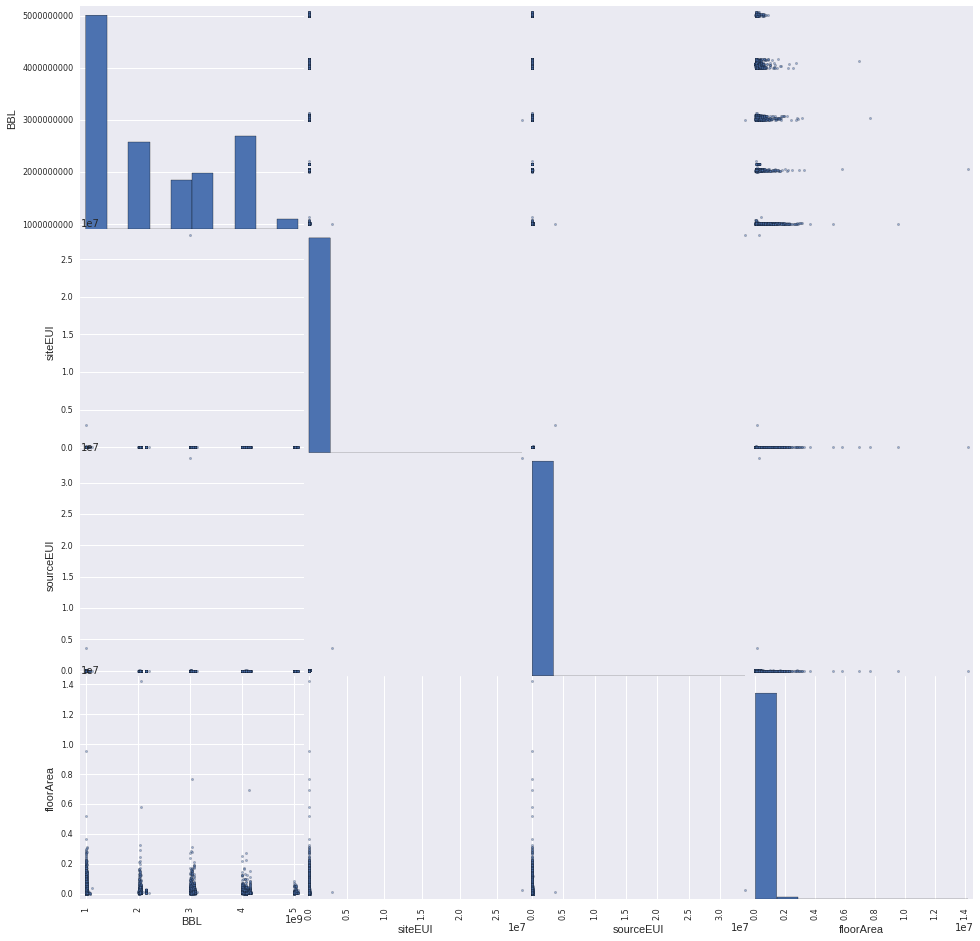

In [12]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(nrg, figsize=(16, 16))

In [17]:
bsize = bsize.loc[:,['BBL','UnitsTotal']]
bsize.columns

Index([u'BBL', u'UnitsTotal'], dtype='object')

In [15]:
nrg.columns

Index([u'BBL', u'siteEUI', u'sourceEUI', u'floorArea'], dtype='object')

In [18]:
print bsize.shape
print nrg.shape

(42697, 2)
(16170, 4)


In [20]:
#merge data sets by BBL keeping all rows from the energy data set
bblnrgdata = pd.merge(left = nrg, right=bsize, how = 'left', on = 'BBL')
bblnrgdata.shape

(16170, 5)

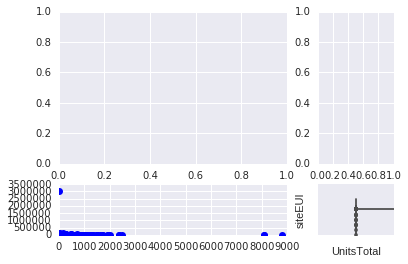

In [47]:
fig = plt.figure(figsize=(16,12))

ax = plt.subplots(2,2,figsize=(15,15))
ax = seaborn.boxplot(bblnrgdata.UnitsTotal)

#ax2 = fig.add_subplot(2,2,3)
ax3.plot(bblnrgdata.UnitsTotal,bblnrgdata.siteEUI,'bo')

#ax3 = fig.add_subplot(2,2,4)
ax4 = seaborn.boxplot(bblnrgdata.siteEUI,orient = 'v')


#ax.set_xlim(0,1000)
#ax.set_ylim(0,500000)


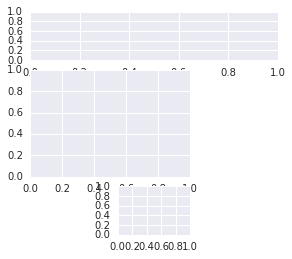

In [67]:
ax = plt.subplot2grid((4,4),(0, 0), colspan=3,rowspan=1)
ax2 = plt.subplot2grid((4,4),(1, 0), colspan=2,rowspan=2)
ax3 = plt.subplot2grid((4,4), (3, 1), colspan=1,rowspan=3)




/home/pipe/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


{'boxes': [<matplotlib.lines.Line2D at 0x7f05106bc110>],
 'caps': [<matplotlib.lines.Line2D at 0x7f04fce20110>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f05106c6090>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f04fce20850>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f05106bc910>,
  <matplotlib.lines.Line2D at 0x7f05106bcc90>]}

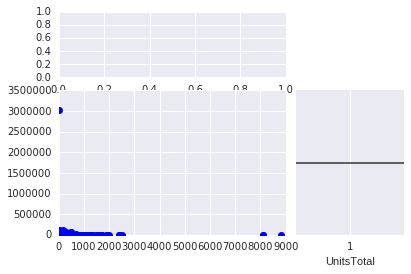

In [91]:
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=.1, right=.9, wspace=0.1)
ax1 = plt.subplot(gs1[:1, :2])
ax2 = plt.subplot(gs1[1:3,:2])
ax3 = plt.subplot(gs1[1:3,2:3])

ax1 = seaborn.boxplot(bblnrgdata.UnitsTotal)

#ax2 = fig.add_subplot(2,2,3)
ax2.plot(bblnrgdata.UnitsTotal,bblnrgdata.siteEUI,'bo')

#ax3 = fig.add_subplot(2,2,4)
ax3.boxplot(bblnrgdata.siteEUI)


In [50]:
np.log10(bblnrgdata.UnitsTotal)

0             NaN
1             NaN
2             NaN
3        0.000000
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12            NaN
13            NaN
14            NaN
15       0.602060
16       1.748188
17            NaN
18            NaN
19            NaN
20            NaN
21            NaN
22            NaN
23            NaN
24       2.170262
25            NaN
26            NaN
27            NaN
28       0.000000
29       1.204120
           ...   
16140         NaN
16141         NaN
16142         NaN
16143         NaN
16144         NaN
16145         NaN
16146         NaN
16147         NaN
16148         NaN
16149         NaN
16150         NaN
16151    1.176091
16152    1.397940
16153    1.230449
16154         NaN
16155         NaN
16156         NaN
16157         NaN
16158         NaN
16159         NaN
16160         NaN
16161         NaN
16162         NaN
16163    0.000000
16164    0